Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then run the cells accordingly.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "曾致崴"
COLLABORATORS = "王靖淳"

---

#Introduction to AI - Robotics

This is an undergrad course in NYCU.

This tutorial includes two parts:
* The MLP is from the BMM summer course 2018.


#Multi-Layer Perceptron

**Reference** Yen-Ling Kuo and Eugenio Piasini for the [Brains, Minds and Machines summer course 2018](http://cbmm.mit.edu/summer-school/2018).

## Implementing a Multi-layer Perceptron

### XOr Problem

The XOr (exclusive or) problem is a classical problem in artificial neural network research. It uses a neural network to predict the output of a XOr logic gate given two binary inputs.

Here, we relax the XOr problem a bit. Instead of binary inputs, we give inputs in real values. When the two input values have the same sign, the network should output 0; otherwise, the network should output 1.

This is how the training data looks like in a 2D plot. The red dot means the output label is 0, the blue dot means the output label is 1.

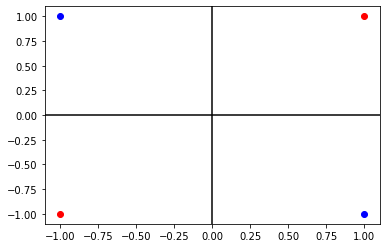

In [2]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# input of the MLP
X = np.array([[1,1], [1,-1], [-1,-1], [-1,1]])
# output of the MLP
y = np.array([[0], [1], [0], [1]])

# plot the training data
fig, ax = plt.subplots()
for i in range(y.shape[0]):
  if y[i][0] == 0:
    marker = 'ro'
  else:
    marker = 'bo'
  ax.plot(X[i][0], X[i][1], marker)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

Clearly, these data points are not linearly separable. We can not find one single line to classify the points correctly.

In this part, we will build a multi-layer perceptron with nonlinearity to make predictions.

### Implementing Activation Functions

There are several activation functions to choose from, including sigmoid, tanh, relu, etc. Here, we implemented the sigmoid function as an example. In order to do backpropagation, we need to implement its derivative as well.

Please implement the sigmoid function:
$$\sigma(x) = \frac{1}{1+e^{-x}}$$

In [3]:
# Sigmoid Function
def sigmoid(x):
    # YOUR CODE HERE
    a = 0.0
    a = 1 / (1 + np.exp(-x))
    return a
    raise NotImplementedError()
    

print(sigmoid(100))
print(sigmoid(-100))
print(sigmoid(1.2))

1.0
3.7200759760208356e-44
0.7685247834990175


In [4]:
assert sigmoid(100) == 1
assert sigmoid(-100) < 0.000000001
assert sigmoid(1.2) - 0.768524783 < 0.00001

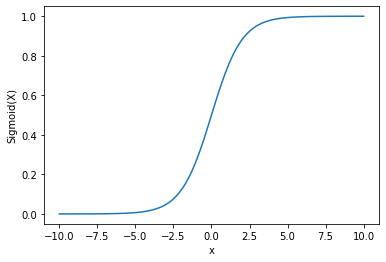

In [5]:
x_axis = np.linspace(-10, 10, 100)
y_axis = sigmoid(x_axis)

  
plt.plot(x_axis, y_axis)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()


For more detail of derivative of sigmoid function:
https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e


In [6]:
# Derivative of Sigmoid Function
def derivative_sigmoid(x):
    return x * (1 - x)

### A Simple MLP Architecture

We design a simple MLP to solve this problem. The MLP consists of a hidden layer and an output layer to map the hidden vector to the output values. 

First, we initialize the weight and bias of each layer as well as the training epoch and learning rate. 

In [7]:
epoch = 10000 # number of training iterations
learning_rate = 0.1

# dimension of each layer
d_in = X.shape[1] # number of features in the input dataset
d_h = 3   # hidden layer
d_out = 1 # output layer


For each training iteration, we run one forward pass to get the predicted value and compute the loss between the prediction and the real value. For simplicity, we use the differences between the two values as the loss function. Then, we can compute the gradients and finally update the weights and biases.

In [11]:
def train_mlp(d_in, d_h, d_out, epoch = 10000, learning_rate = 0.1):
    # defin
    y_pred = 0
    loss = 0 


    # weight and bias initialization
    wh = np.random.uniform(size=(d_in, d_h))
    bh = np.random.uniform(size=(1, d_h))
    wout = np.random.uniform(size=(d_h, d_out))
    bout = np.random.uniform(size=(1, d_out))
    loss_epoch = []

    for i in range(epoch):
        # Forward pass
        h = sigmoid(X.dot(wh) + bh)
        y_pred = sigmoid(h.dot(wout) + bout)

        # Compute and print loss
        loss = (y_pred - y).sum()
        loss_epoch.append(loss)

        if i % 500 == 0:
            print('Epoch', i, ':', loss)

        # Backpropagation to compute gradients
        grad_y_pred = (y - y_pred) * derivative_sigmoid(y_pred)
        grad_wout = h.T.dot(grad_y_pred)
        grad_bout = np.sum(grad_y_pred, axis=0, keepdims=True)
        grad_h = grad_y_pred.dot(wout.T) * derivative_sigmoid(h)
        grad_wh = X.T.dot(grad_h)
        grad_bh = np.sum(grad_h, axis=0, keepdims=True)

        # Update weights and biases
        # hint:
        # you should update wout, bout, wh, bh with grad_wout, grad_bout, grad_wh, grad_bh multiplied by learning_rate
        # YOUR CODE HERE
        wout = wout + grad_wout * learning_rate
        bout = bout + grad_bout * learning_rate
        wh = wh + grad_wh * learning_rate
        bh = bh + grad_bh * learning_rate
        raise NotImplementedError()

    print(y_pred)
    return loss_epoch, loss, y_pred


In [12]:
loss_epoch, loss, y_pred = train_mlp(d_in, d_h, d_out, epoch, learning_rate)
assert loss < 0.1

x_axis = list(range(epoch))
y_axis = loss_epoch
plt.plot(x_axis, y_axis)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

Epoch 0 : 1.4314605622033347


NotImplementedError: ignored

In [13]:
loss_epoch, loss, y_pred = train_mlp(d_in, d_h, d_out, epoch, learning_rate)
print('Prediction of training data:')
print(y_pred)

assert y_pred[0] < 0.1
assert y_pred[1] > 0.9
assert y_pred[2] < 0.1
assert y_pred[3] > 0.9


Epoch 0 : 0.9582151906426272


NotImplementedError: ignored

The predicted values are very close to the labels in the training data. Since they are real values, to get the binary output, we can simply threshold the output to decide which label we want to assign.

Although it is possible to implement any kind of layers and optmization methods with numpy, there are several machine learning libraries available. So, it is easier to build neural networks of different architectures.

